In [483]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


In [ ]:
from google.colab import files
files.upload()

In [485]:
#understanding format of data
food=pd.read_csv("food.csv")
food.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [486]:
#convert yes and no values to binary
food = food.replace(to_replace = ['Yes','No'],value = [1,0])
food

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [487]:
food.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [488]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(12), object(3)
memory usage: 170.4+ KB


In [489]:
food.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.281653
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.070597
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.146217
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.139254
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.233554
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.020558
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.016958
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.194576
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.070851
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.021366


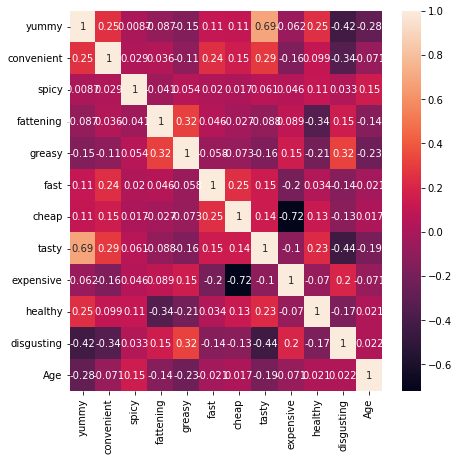

In [490]:
#heatmap to study correlation between variables
plt.figure(figsize=(7,7))
sns.heatmap(food.corr(), annot=True)
plt.show()

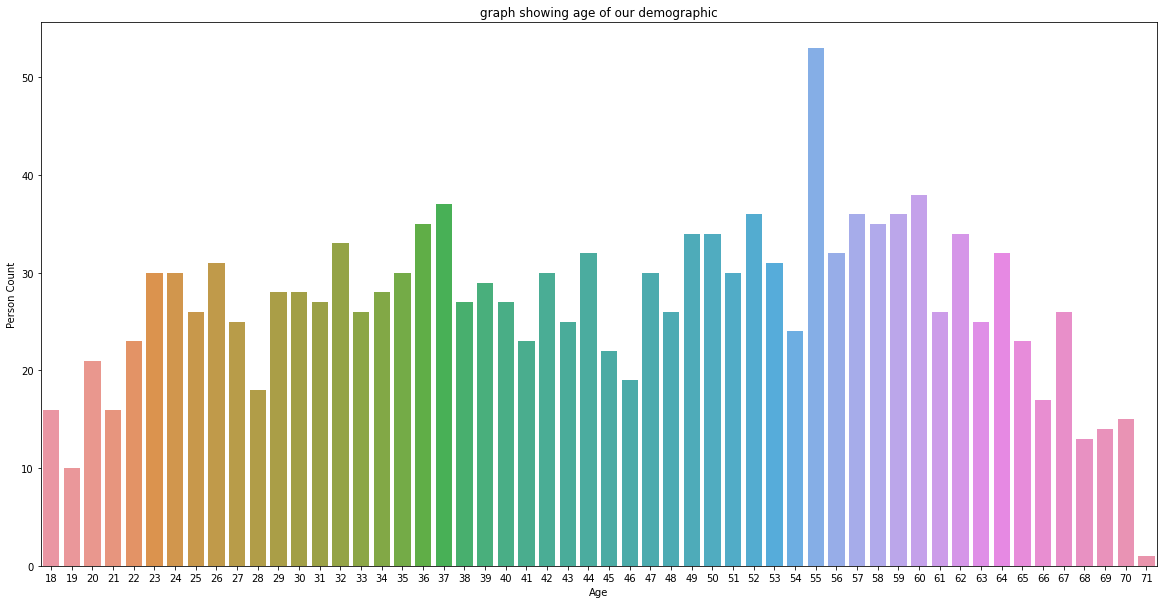

In [491]:
#plotting age of customers
plt.figure(figsize=(20,10))
sns.countplot(x=food.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.title('graph showing age of our demographic')
plt.show()

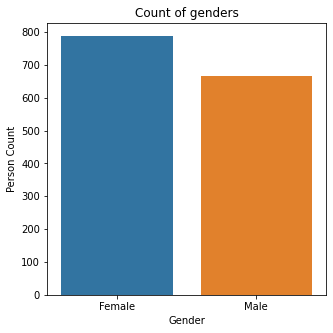

In [492]:
#plotting count of genders
plt.figure(figsize=(5,5))
sns.countplot(x=food.Gender)
plt.xlabel("Gender")
plt.ylabel("Person Count")
plt.title('Count of genders')
plt.show()

In [493]:
temp=food[['VisitFrequency','Gender','Like','Age']]
food=food.drop(['VisitFrequency','Gender','Like','Age'], axis = 1)


In [494]:
pca = PCA(n_components=11)

principalComponents = pca.fit_transform(X = food)

# to get how much variance was retained
print(pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [495]:
#create dataframe of pca 
pca_food = pd.DataFrame(data = principalComponents
             , columns = ['pca 1', 'pca 2','pca 3', 'pca 4','pca 5', 'pca 6','pca 7', 'pca 8','pca 9', 'pca 10','pca 11'])
pca_food.tail()

,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9,pca 10,pca 11
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316
1452,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076


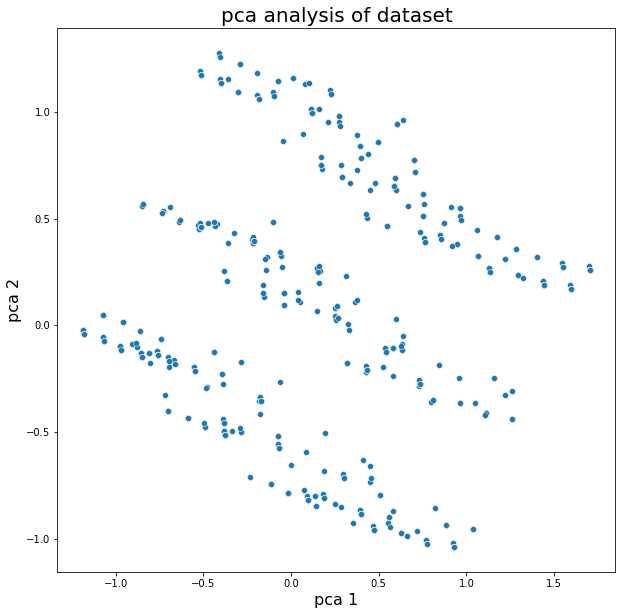

In [496]:
#plot betweeen first and second principle component

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="pca 1", y="pca 2",
    palette=sns.color_palette("hls", 10),
    data=pca_food[['pca 1','pca 2']]
)
plt.xlabel('pca 1',fontsize=16)
plt.ylabel('pca 2',fontsize=16)
plt.title('pca analysis of dataset',fontsize=20)
plt.show()

In [497]:
#relation between principle components and original variables
loadings=np.round(pca.components_.T * np.sqrt(pca.explained_variance_),3)
print(loadings)

[[-0.361  0.221 -0.154  0.022 -0.104  0.053 -0.081  0.004  0.152 -0.027
   0.011]
 [-0.118  0.01  -0.032 -0.057  0.094 -0.108 -0.017 -0.031 -0.005 -0.166
  -0.128]
 [-0.005  0.011 -0.019  0.079  0.024 -0.11   0.205  0.103  0.106 -0.019
   0.034]
 [ 0.088 -0.021 -0.163 -0.141 -0.025 -0.126 -0.112  0.162 -0.043 -0.001
   0.059]
 [ 0.23  -0.039 -0.405  0.101  0.122  0.065  0.01  -0.038 -0.001  0.002
   0.   ]
 [-0.082 -0.053 -0.033 -0.039  0.036 -0.184 -0.025 -0.173  0.044  0.06
   0.08 ]
 [-0.255 -0.371 -0.075  0.047 -0.044 -0.032 -0.012  0.039  0.02   0.107
  -0.116]
 [-0.357  0.187 -0.145 -0.001 -0.071 -0.024  0.104 -0.02  -0.17   0.02
   0.005]
 [ 0.249  0.365  0.012  0.027 -0.001 -0.081 -0.02   0.008  0.018  0.113
  -0.116]
 [-0.162  0.047  0.097  0.304  0.097 -0.055 -0.101  0.049 -0.049 -0.009
   0.037]
 [ 0.284 -0.085 -0.045  0.147 -0.246 -0.065 -0.008 -0.046 -0.019 -0.072
  -0.01 ]]


 **Clustering algorithms** 

k means

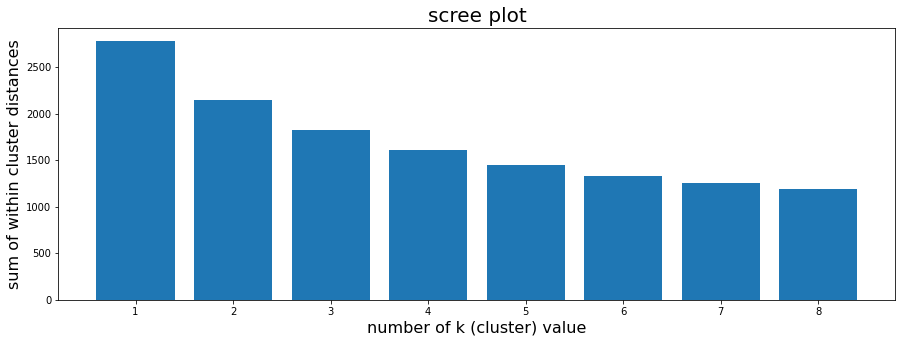

In [498]:
#find best value for k
distortion=[]
for k in range(1,9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(food)
    distortion.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.bar(range(1,9),distortion)
plt.title('scree plot',fontsize=20)
plt.xlabel("number of k (cluster) value",fontsize=16)
plt.ylabel("sum of within cluster distances",fontsize=16)
plt.show()

In [499]:
#finding silhouette score for each value of k
silhouette_coefficients = []
for k in range(2,9):
     kmeans1 = KMeans(n_clusters=k)
     kmeans1.fit(food)
     score = silhouette_score(food, kmeans1.labels_)
     silhouette_coefficients.append(score)

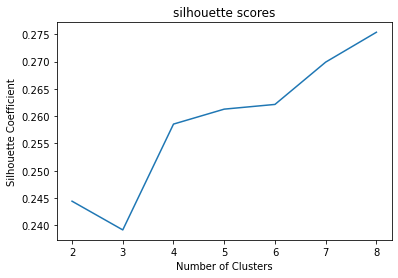

In [500]:
#plotting silhouette scores
plt.plot(range(2, 9), silhouette_coefficients)
plt.xticks(range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("silhouette scores")
plt.show()

We can see that the silhouette scores are low so no good information is obtained on number of market segments to extract

gaussian mixture

In [501]:
#finding best value of k for gaussian mixture model
bic=[]
aic=[]

for k in range(1,9):
    gmix= GaussianMixture(n_components=k, covariance_type="full")
    gmix.fit(food)
    score=gmix.bic(food)
    bic.append(score)
    aic.append(gmix.aic(food))


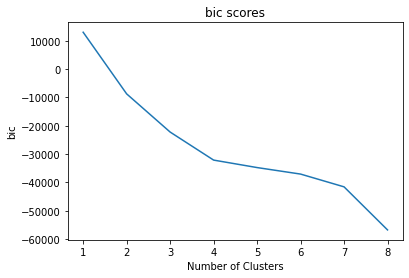

In [502]:
plt.plot(range(1, 9), bic)
plt.xticks(range(1, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("bic")
plt.title("bic scores")
plt.show()

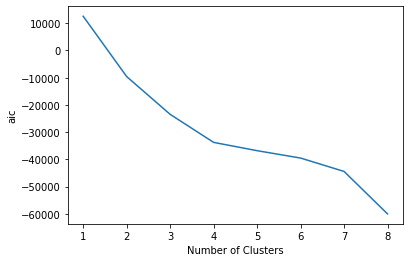

In [503]:
plt.plot(range(1, 9), aic)
plt.xticks(range(1, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("aic")
plt.show()

from here we can see the model recommends 7-8 clusters but for convenience we can assume 4 clusters 

hierarchical cluster analysis

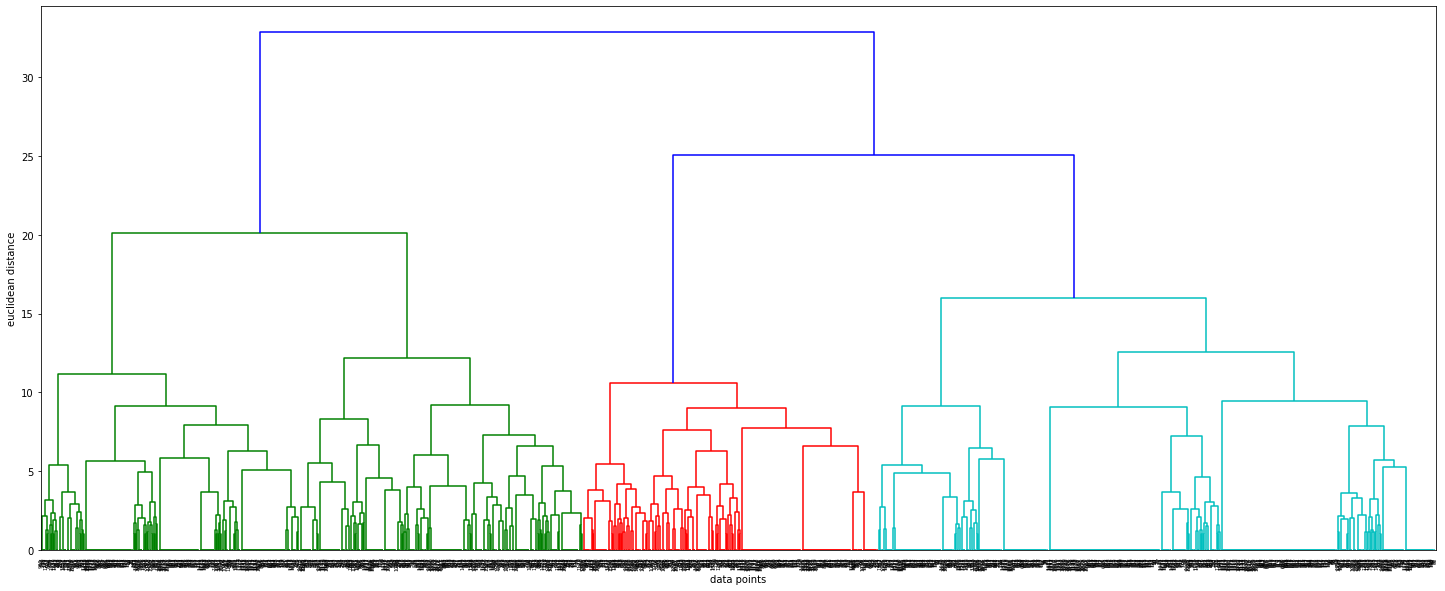

In [504]:
merg = linkage(food,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [505]:
#We save our final cluster model from the kmeans algorithm 
kmeansfinal = KMeans(n_clusters=4)
kmeansfinal.fit(food)

KMeans(n_clusters=4)

profiling segments

In [506]:
#adding descriptor variables back to our dataset along with cluster of each datapoint
food[['VisitFrequency','Age','Like','Gender']]=temp[['VisitFrequency','Age','Like','Gender']]
food['cluster']=kmeansfinal.labels_
food.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,VisitFrequency,Age,Like,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,Every three months,61,-3,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,Every three months,51,+2,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,Every three months,62,+1,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,Once a week,69,+4,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,Once a month,49,+2,Male,3


In [507]:
print(food['Like'].unique())

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']


In [508]:
food = food.replace(to_replace = ['I love it!+5','I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4'],value = [5,-5,-4,-3,-2,-1,0,1,2,3,4])
food.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,VisitFrequency,Age,Like,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,Every three months,61,-3,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,Every three months,51,2,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,Every three months,62,1,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,Once a week,69,4,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,Once a month,49,2,Male,3


In [509]:
food.groupby('cluster').mean()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Like
cluster,,,,,,,,,,,,,
0,0.851852,0.959877,0.132716,0.904321,0.617284,0.858025,0.108025,0.932099,0.898148,0.203704,0.104938,39.854938,2.120370
1,0.887931,0.981034,0.086207,0.794828,0.329310,0.960345,0.922414,0.975862,0.017241,0.320690,0.043103,43.470690,2.665517
2,0.020747,0.680498,0.082988,0.917012,0.705394,0.746888,0.066390,0.087137,0.892116,0.062241,0.730290,48.029046,-2.668050
3,0.022727,0.892857,0.074675,0.925325,0.662338,0.951299,0.922078,0.152597,0.012987,0.071429,0.383117,49.058442,-1.496753


Plots for describing segments

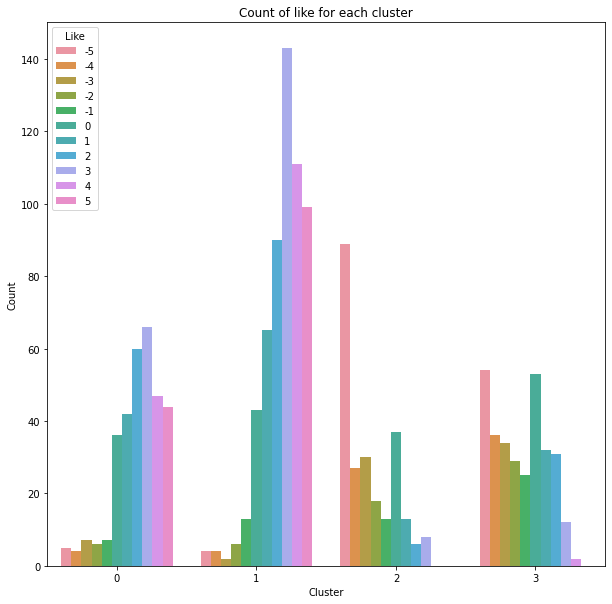

In [510]:
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='Like',data=food)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of like for each cluster")
plt.show()

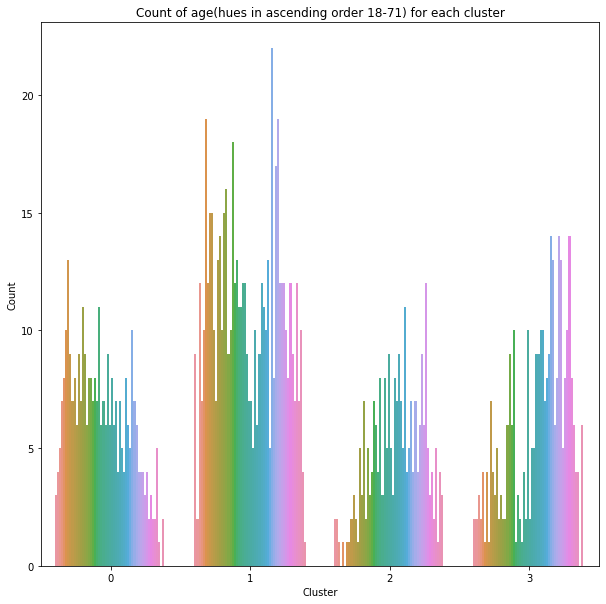

In [511]:
plt.figure(figsize=(10,10))
g=sns.countplot(x='cluster',hue='Age',data=food)
g.legend_.remove()
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of age(hues in ascending order 18-71) for each cluster")
plt.show()

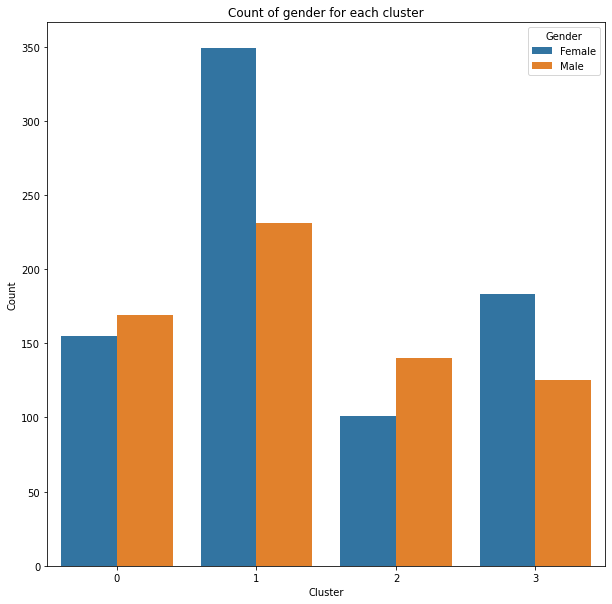

In [512]:
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='Gender',data=food)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of gender for each cluster")
plt.show()

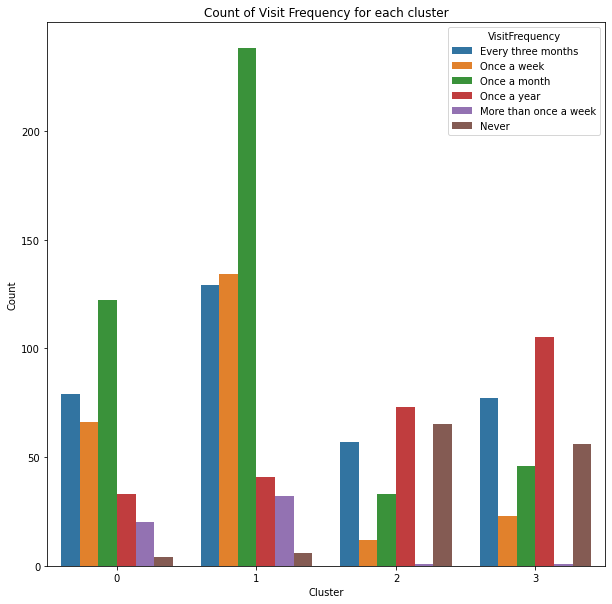

In [513]:
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='VisitFrequency',data=food)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of Visit Frequency for each cluster")
plt.show()

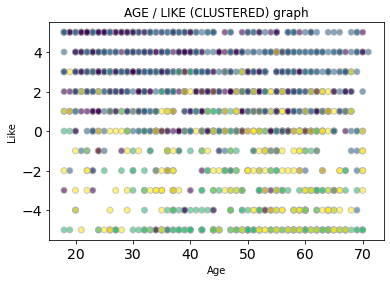

In [514]:
plt.scatter('Age', 'Like', 
               data = food,  
               c = 'cluster', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / LIKE (CLUSTERED) graph', 
          )
plt.xlabel('Age', 
          )
plt.ylabel('Like', 
           )
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

Using the above plots we can select a target market segment for making our market mix